# Exploitation des images satellite reçues par METEOR M2 pour modéliser l'évolution du climat


(Partie 3/3) 

*Les satellites météorologiques en orbite basse, tel que Meteor M2, ont un rôle important pour la surveillance du réchauffement climatique, de la bonne santé de la végétation, de la fonte des glaciers...etc. Cette surveillance est possible grâce à l'envoi d'images (principalement IR) par le satellite vers des stations au sol (cf partie 1 et 2). L'objectif de cette activité est de comprendre comment, grâce à l'étude des rayonnements émis par la Terre, on peut obtenir des informations importantes pour les climatologues.*


# I. Infrarouge proche

Le satellite envoie trois images sur trois canaux en même temps. La plupart du temps il utilise les canaux ci-dessous, situés dans le visible et l'infrarouge proche:

<table><tr><td><img src='ch1.bmp'></td><td><img src='ch2.bmp'></td><td><img src='ch3.bmp'></td></tr></table>

De gauche à droite:

## Canal 1:    0.5 - 0.7 $\mu$m ;       Canal 2:     0.7 - 0.11 $\mu$m ;       Canal 3:     1.6 - 1.8 $\mu$m .

## 1) Mise en évidence de la neige et des glaciers

Les propriétés optiques de la glace et de la neige (https://www.esa.int/SPECIALS/Eduspace_Global_FR/SEMLYHTWLUG_0.html)
 
Les propriétés optiques d'un matériau influent sur la façon dont le rayonnement optique réagit lorsqu'il en frappe la surface. Chaque matériau a une signature spectrale propre qui en reflète le degré de réflexion, d'absorption et de transmission, à diverses longueurs d'onde du rayonnement reçu.
 
La glace et l'eau font généralement preuve d'un haut degré de réflexion aux longueurs d'ondes visibles dites VIS (de 0,4 à 0,75 µm environ), d'une réflexion moindre dans le proche infrarouge ou NIR (de l'anglais « Near InfraRed », longueurs d'onde d'environ 0,78 à 0,90 µm) et d'une réflexion très faible dans l'infrarouge à ondes courtes ou SWIR (de l'anglais « ShortWave InfraRed », longueurs d'onde d'environ 1,57 à 1,78 µm). La faible réflexion de la glace et de la neige dans le SWIR est liée à leur teneur en eau liquide microscopique (le VIS et le NIR sont souvent regroupés sous l'abréviation VNIR). Cependant la réflexion caractéristique varie avec la composition réelle du matériau concerné et diffère donc pour la neige, le névé, la glace de glacier et la glace de glacier sale.   

<img src='neige.jpg'>

<table><tr><td><img src='neige2.png'></td><td><img src='neige3.png'></td></tr></table>
(source: https://www.shf-lhb.org/articles/lhb/pdf/1984/05/lhb1984041.pdf)


En observant les trois images receptionnées (au niveau des Alpes par exemple), quelle gamme de longueurs d'onde est la plus réfléchie par la neige et les glaciers? Est-ce cohérent avec les graphique ci-dessus? 

Quelle gamme de longueur d'onde n'est quasiment pas réfléchie?

Qu'en est-il pour les nuages?

In [1]:
from PIL import Image
import numpy as np

    
#on ouvre et on charge les images dans 3 variables ch1, ch2 et ch3:

im1=Image.open("ch1.bmp")   #canal visible (VIS) 0.5 - 0.7 um
im2=Image.open("ch2.bmp")   #canal IR (NIR) 0.7 - 0.11 um
im3=Image.open("ch3.bmp")   #canal IR (SWIR) 1.6 - 1.8 um

ch1=im1.load()
ch2=im2.load()
ch3=im3.load()

largeur,hauteur = im1.size

def falseColor(r,g,b):
    """fonction qui créée une image en fausse couleur, en paramètres il faut indiquer 
    les voies ch1, ch2 ou ch3 affectées à chaque couleur r, g, b.
    Exemple: falseColor(ch1,ch2,ch3) créé une image couleur avec pour composante rouge les données du canal 1,
    pour composante verte les données du canal 2 et pour composante rouge les données du canal 3."""

    #on crée une nouvelle image noire img de mêmes dimensions:
    array = np.zeros([hauteur, largeur, 3], dtype=np.uint8)
    img = Image.fromarray(array)

    # Boucle qui affecte à chaque pixel la valeur (r,g,b) correspondante 
    for i in range(largeur):
        for j in range(hauteur):
            img.putpixel((i,j),(r[i,j],g[i,j],b[i,j]))
    img.save('out.png','PNG')
    img.show()


Quelles sont les paramètres à passer à la fonction falseColor(r,g,b) pour faire ressortir au mieux les parties enneigées (en bleu par exemple)?

In [2]:
falseColor(r=ch3,g=ch3,b=ch1)  #la neige absente de ch3 ne se retrouve pas dans les composantes r et g, uniquement dans la b

Que faudrait-il effectuer si on voulait l'afficher en cyan?

In [3]:
falseColor(r=ch3,g=ch2,b=ch1)  #la neige absente de ch3 ne se retrouve pas dans la composante r, mais dans g et b donc cyan

<table><tr><td><img src='BLEU.png'></td><td><img src='CYAN.png'></td></tr></table>

## 2) Mise en évidence de la végétation

L'indice de végétation par différence normalisé, appelé aussi NDVI est construit à partir des canaux rouge (VIS) et proche infra rouge (NIR). 

L'indice de végétation normalisé met en valeur la différence entre la bande visible du rouge et celle du proche infrarouge. 

$$NDVI=\dfrac{(NIR-VIS)}{(NIR+VIS)}$$

Cet indice est sensible à la vigueur et à la quantité de la végétation.Les valeurs du NDVI sont comprises entre -1 et +1, les valeurs négatives correspondant aux surfaces autres que les couverts végétaux, comme la neige, l'eau ou les nuages pour lesquelles la réflectance dans le rouge est supérieure à celle du proche infrarouge. Pour les sols nus, les réflectances étant à peu près du même ordre de grandeur dans le rouge et le proche infrarouge, le NDVI présente des valeurs proches de 0. Les formations végétales quant à elles, ont des valeurs de NDVI positives, généralement comprises entre 0,1 et 0,7. Les valeurs les plus élevées correspondant aux couverts les plus denses

<img src='ndvi_example_L.jpg'>

<IPython.core.display.Javascript object>


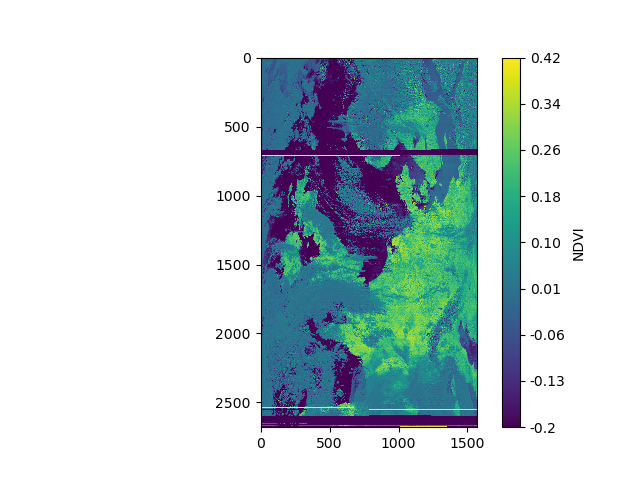

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

#NDVI


array = np.zeros([hauteur, largeur], dtype=np.uint8)
img = Image.fromarray(array)

for i in range(largeur):
	for j in range(hauteur):
		try:
			ndvi=(ch2[i,j]-ch1[i,j])/(ch2[i,j]+ch1[i,j])
			array[j,i]=ndvi*127+127                       #*127 -> [-127;127] ; +127 -> [0;254]
		except:
			pass  #si division par zéro



imgplot = plt.imshow(array)
imgplot.set_clim(100,180)

cbar=plt.colorbar()
cbar.set_label('NDVI')
cbar.ax.set_yticklabels(['-0.2', '-0.13', '-0.06', '0.01', '0.10','0.18','0.26','0.34','0.42'])
plt.show()


<img src='vegetation.png'>

<img src='vegetation_zoom.png'>

<img src='comparaison.png'>

# II. Bande des 10.5 - 11.5 $\mu$m - Température


Le satellite envoie parfois (quand?) une image sur le canal 5, autour de 11 $\mu$ m. Les canaux envoyés sont les 1,2 et 5. 

<table><tr><td><img src='ex_64_0.5-0.7.bmp'></td><td><img src='ex_65_0.7-1.1.bmp'></td><td><img src='ex_68_10.5-11.5.bmp'></td></tr></table>

De gauche à droite:

## Canal 1:    0.5 - 0.7 $\mu$m ;       Canal 2:     0.7 - 0.11 $\mu$m ;      Canal 5:     10.5 - 11.5 $\mu$m .

*Sur le canal 5, les valeurs sont inversées (couleurs claires = peu de radiations, basses températures et couleurs foncées = bcp de radiations, hautes températures)*



*PISTES:  loi de Stefan - Boltzmann: $\lambda_{max} \simeq 11 \mu m$ pour $T \simeq 300K$*


*Comment exploiter l'image autour de 10.5 - 11.5 $\mu m$ pour obtenir des informations de température?*